In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [3]:
# Split data
train_img, test_img, train_lbl, test_lbl = train_test_split(


    mnist.data, mnist.target, test_size=0.3, random_state=0, stratify=mnist.target)

print(train_img.shape)

# Valid split
test_img, val_img, test_lbl, val_lbl = train_test_split(
    test_img, test_lbl, test_size=0.5, random_state=0, stratify=test_lbl)

class_counts = np.bincount(val_lbl.astype(int))

for class_id, count in enumerate(class_counts):
    print(f"Klasa {class_id}: {count} wzorców")

(49000, 784)
Klasa 0: 1036 wzorców
Klasa 1: 1181 wzorców
Klasa 2: 1048 wzorców
Klasa 3: 1071 wzorców
Klasa 4: 1024 wzorców
Klasa 5: 947 wzorców
Klasa 6: 1032 wzorców
Klasa 7: 1094 wzorców
Klasa 8: 1024 wzorców
Klasa 9: 1043 wzorców


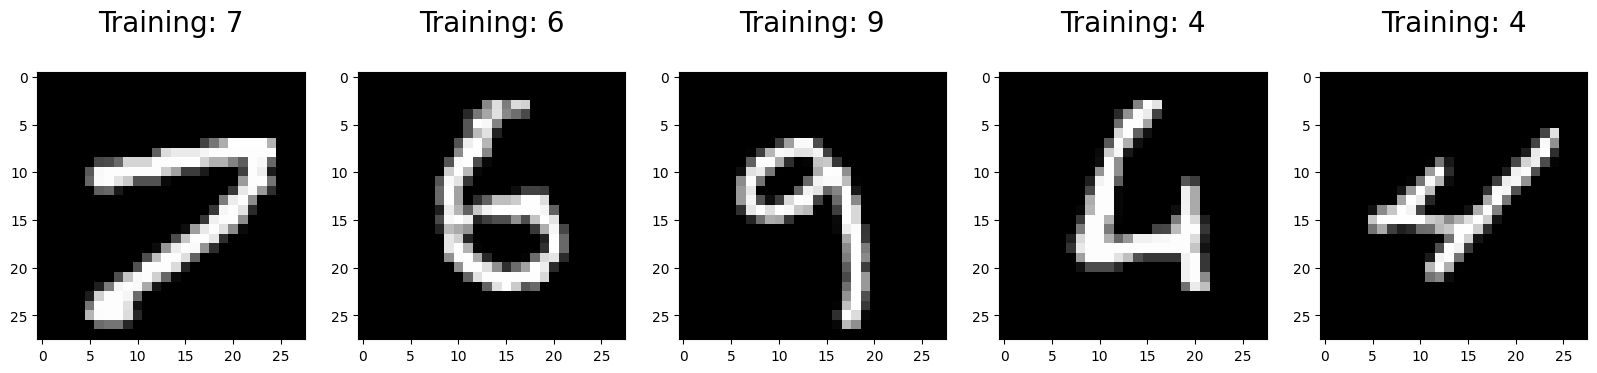

In [4]:
# Plot example data
plt.figure(figsize=(20, 4))


for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):

    plt.subplot(1, 5, index+1)

    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)

    plt.title('Training: %s\n' % label, fontsize=20)

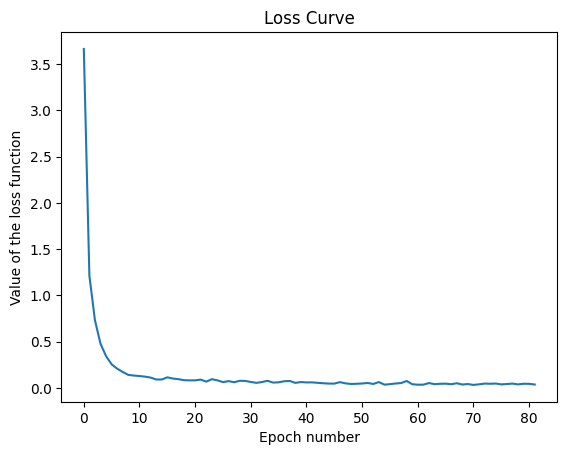

In [5]:
# Default
clf = MLPClassifier()

clf.fit(train_img, train_lbl)
predictions = clf.predict(test_img)
# Loss function plot
plt.plot(clf.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Epoch number')
plt.ylabel('Value of the loss function')
plt.show()

In [6]:
# Predicts
predictions_train = clf.predict(train_img)

predictions_test = clf.predict(test_img)

train_score = accuracy_score(predictions_train, train_lbl)


print('Score on train data: ', train_score)

test_score = accuracy_score(predictions_test, test_lbl)


print('Score on test data: ', test_score)

Score on train data:  0.9934489795918368
Score on test data:  0.963047619047619


In [7]:
# Five error predictions
index = 0

badIndex = 0

misclassifiedIndexes = []


for label, predict in zip(test_lbl, predictions):
    badIndex = badIndex+1
    if label != predict:
        misclassifiedIndexes.append(badIndex)
        print(misclassifiedIndexes[index], label,

              test_lbl[badIndex - 1], predict, predictions[badIndex - 1])
        index += 1

print(test_lbl[4], predictions[4])

86 8 8 5 5
121 3 3 2 2
134 6 6 0 0
135 6 6 1 1
146 5 5 8 8
199 9 9 5 5
287 5 5 6 6
348 5 5 3 3
371 9 9 7 7
402 5 5 6 6
477 4 4 8 8
517 3 3 8 8
520 9 9 3 3
541 2 2 9 9
565 7 7 3 3
574 8 8 0 0
650 8 8 6 6
674 5 5 6 6
680 4 4 9 9
765 4 4 6 6
827 4 4 8 8
853 8 8 6 6
865 2 2 8 8
897 8 8 0 0
915 3 3 8 8
923 9 9 4 4
961 7 7 3 3
983 8 8 5 5
987 7 7 2 2
1005 7 7 3 3
1044 5 5 3 3
1076 9 9 7 7
1099 3 3 7 7
1137 4 4 7 7
1186 2 2 5 5
1195 0 0 6 6
1203 7 7 4 4
1229 9 9 4 4
1264 5 5 3 3
1281 1 1 7 7
1353 2 2 4 4
1363 8 8 5 5
1370 4 4 7 7
1431 8 8 4 4
1449 2 2 1 1
1463 0 0 3 3
1464 7 7 3 3
1477 3 3 8 8
1498 7 7 1 1
1522 7 7 1 1
1539 7 7 9 9
1551 7 7 3 3
1593 8 8 4 4
1615 9 9 4 4
1625 7 7 9 9
1682 3 3 6 6
1700 2 2 0 0
1709 9 9 4 4
1750 1 1 3 3
1831 2 2 7 7
1839 1 1 3 3
1854 5 5 9 9
1880 2 2 4 4
1895 9 9 3 3
1897 6 6 0 0
1937 2 2 4 4
1949 3 3 2 2
1967 5 5 9 9
1974 9 9 8 8
2005 8 8 2 2
2026 5 5 6 6
2056 8 8 3 3
2067 4 4 2 2
2068 3 3 8 8
2082 7 7 4 4
2093 9 9 7 7
2118 1 1 3 3
2119 8 8 3 3
2131 9 9 4 4
214

86 5 8
121 2 3
134 0 6
135 1 6
146 8 5


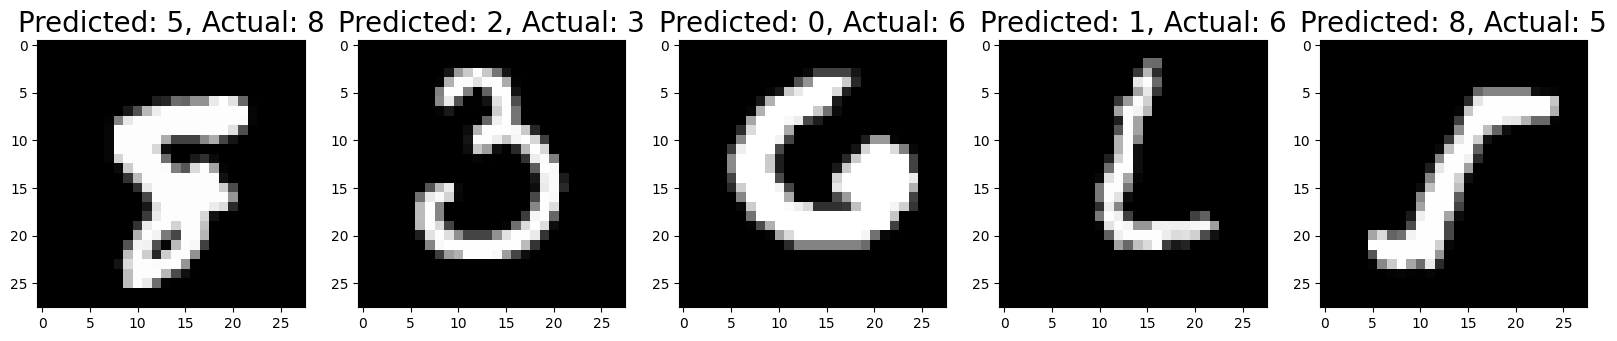

In [8]:
# Plot error predictions
plt.figure(figsize=(20, 4))


for plotIndex, badIndex, in enumerate(misclassifiedIndexes[0:5]):
    print(badIndex, predictions[badIndex - 1], test_lbl[badIndex - 1])
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex-1], (28, 28)), cmap=plt.cm.gray)

    plt.title('Predicted: {}, Actual: {}'.format(

        predictions[badIndex - 1], test_lbl[badIndex-1]), fontsize=20)

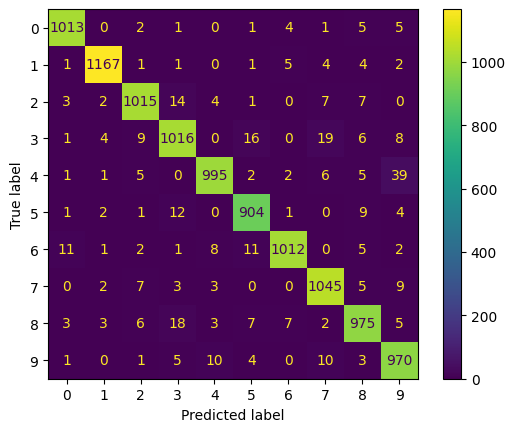

In [9]:
# Confusion matri
ConfusionMatrixDisplay.from_predictions(predictions_test, test_lbl)
plt.show()

c:\Users\pawel\projects\machine_learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


sdg score:  0.9294285714285714


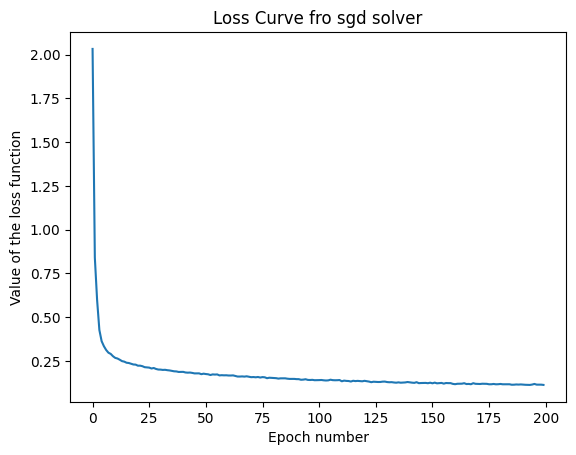

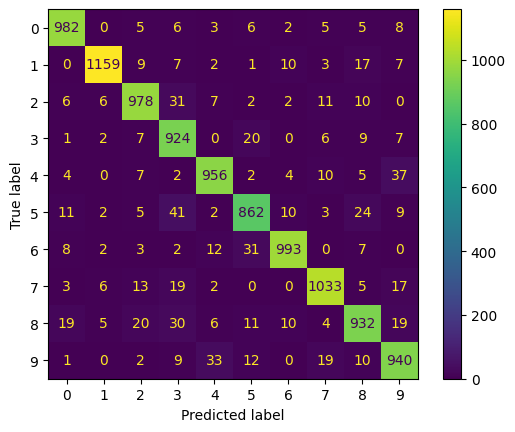

In [10]:
# sgd solver
clf = MLPClassifier(solver='sgd')

clf.fit(train_img, train_lbl)
predictions = clf.predict(test_img)
score = accuracy_score(predictions, test_lbl)
print('sdg score: ', score)
# Loss function plot
plt.plot(clf.loss_curve_)
plt.title('Loss Curve fro sgd solver')
plt.xlabel('Epoch number')
plt.ylabel('Value of the loss function')
ConfusionMatrixDisplay.from_predictions(predictions, test_lbl)
plt.show()

(20,) score:  0.921047619047619


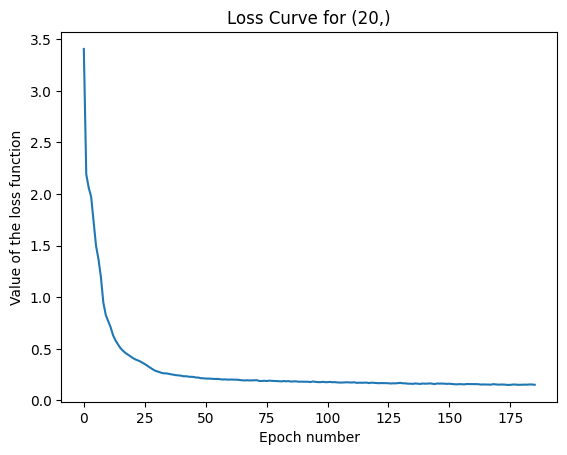

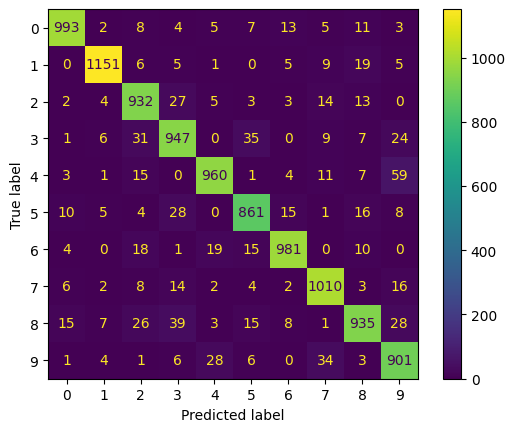

(300,) score:  0.9699047619047619


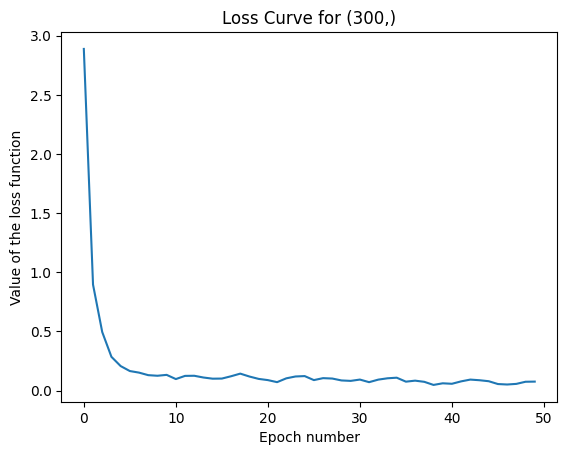

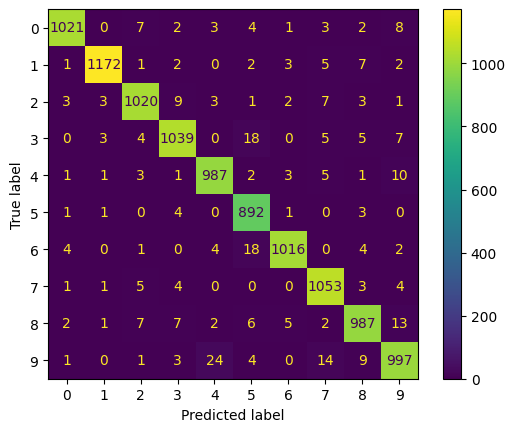

In [11]:
# Different neurons neurons
hidden_layer_sizes = [(20,), (300,)]
for h_layer_size in hidden_layer_sizes:
    clf = MLPClassifier(hidden_layer_sizes=h_layer_size)

    clf.fit(train_img, train_lbl)
    predictions = clf.predict(test_img)
    score = accuracy_score(predictions, test_lbl)
    print(f'{h_layer_size} score: ', score)
    # Loss function plot
    plt.plot(clf.loss_curve_)
    plt.title(f'Loss Curve for {h_layer_size}')
    plt.xlabel('Epoch number')
    plt.ylabel('Value of the loss function')
    ConfusionMatrixDisplay.from_predictions(predictions, test_lbl)
    plt.show()

c:\Users\pawel\projects\machine_learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Disable momentum score:  0.9355238095238095


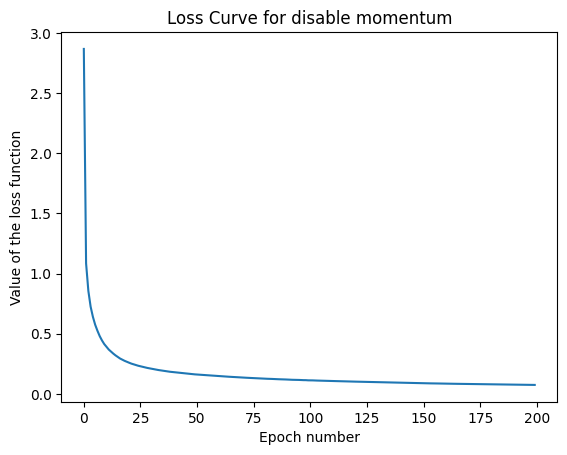

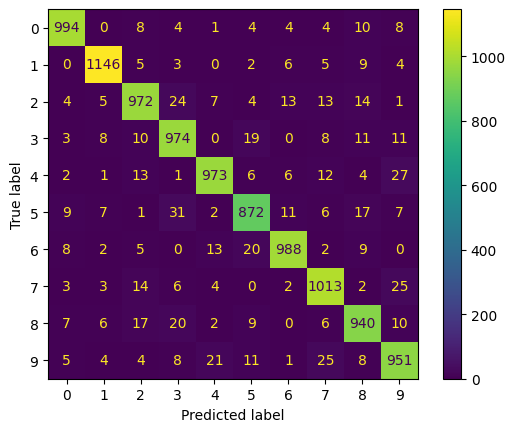

In [12]:
# Disable momentum
clf = MLPClassifier(solver='sgd', momentum=0)

clf.fit(train_img, train_lbl)
predictions = clf.predict(test_img)
score = accuracy_score(predictions, test_lbl)
print('Disable momentum score: ', score)
# Loss function plot
plt.plot(clf.loss_curve_)
plt.title('Loss Curve for disable momentum')
plt.xlabel('Epoch number')
plt.ylabel('Value of the loss function')
ConfusionMatrixDisplay.from_predictions(predictions, test_lbl)
plt.show()

c:\Users\pawel\projects\machine_learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


10 score:  0.9381904761904762


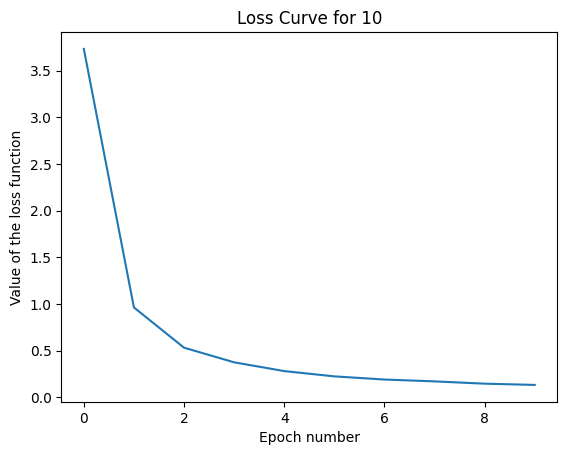

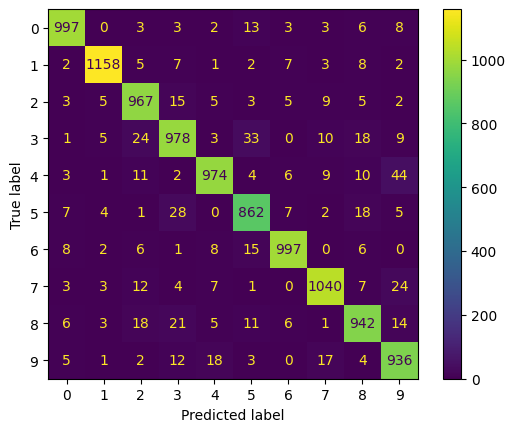

c:\Users\pawel\projects\machine_learning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


50 score:  0.9580952380952381


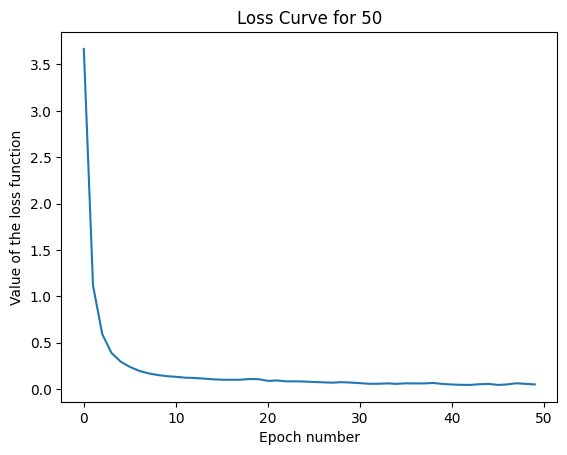

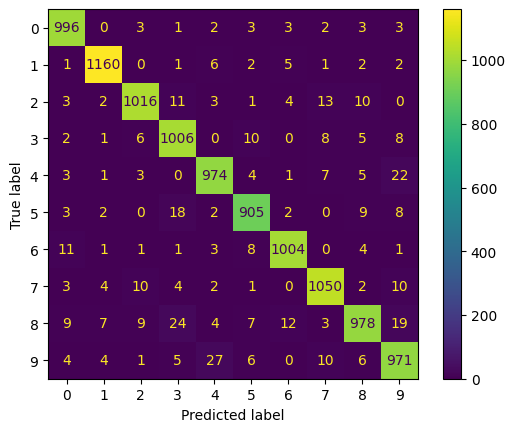

500 score:  0.962952380952381


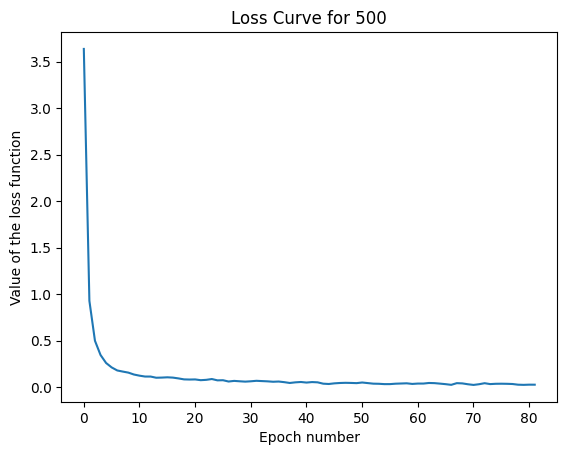

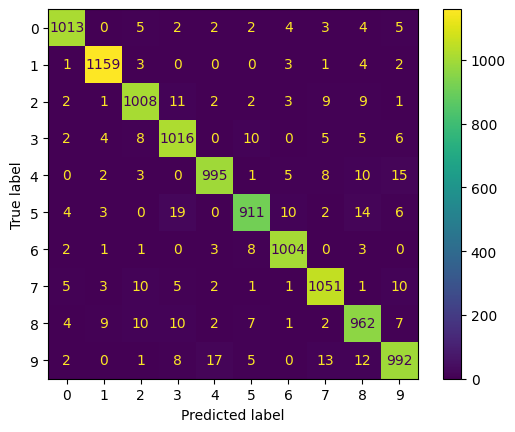

In [13]:
# max iteration
iteration = [10, 50, 500]
for max_i in iteration:
    clf = MLPClassifier(max_iter=max_i)

    clf.fit(train_img, train_lbl)
    predictions = clf.predict(test_img)
    score = accuracy_score(predictions, test_lbl)
    print(f'{max_i} score: ', score)
    # Loss function plot
    plt.plot(clf.loss_curve_)
    plt.title(f'Loss Curve for {max_i}')
    plt.xlabel('Epoch number')
    plt.ylabel('Value of the loss function')
    ConfusionMatrixDisplay.from_predictions(predictions, test_lbl)
    plt.show()

Early stopping score:  0.950952380952381


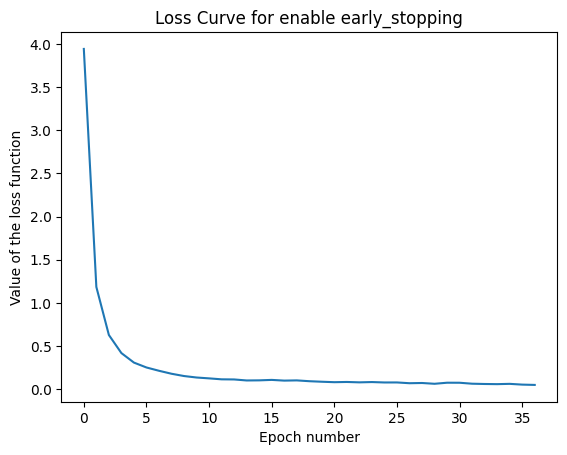

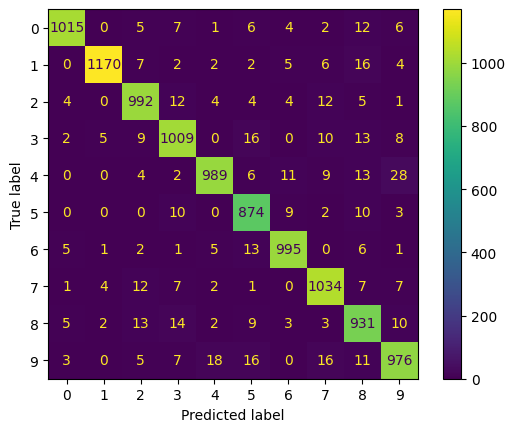

In [14]:
# early_stopping
clf = MLPClassifier(early_stopping=True)

clf.fit(train_img, train_lbl)
predictions = clf.predict(test_img)
score = accuracy_score(predictions, test_lbl)
print('Early stopping score: ', score)
# Loss function plot
plt.plot(clf.loss_curve_)
plt.title('Loss Curve for enable early_stopping')
plt.xlabel('Epoch number')
plt.ylabel('Value of the loss function')
ConfusionMatrixDisplay.from_predictions(predictions, test_lbl)
plt.show()

sigmoidal activation score:  0.9540952380952381


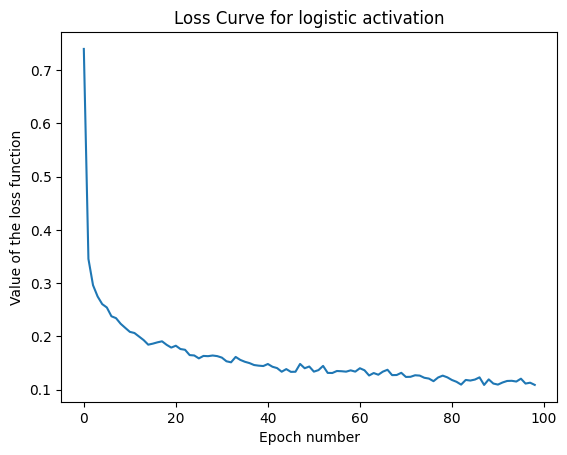

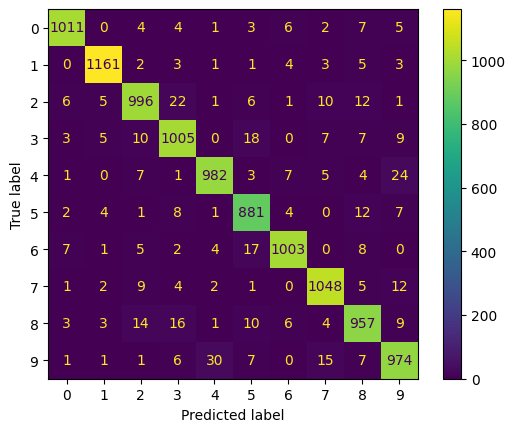

In [15]:
# Different activaction
clf = MLPClassifier(activation='logistic')

clf.fit(train_img, train_lbl)
predictions = clf.predict(test_img)
score = accuracy_score(predictions, test_lbl)
print('sigmoidal activation score: ', score)
# Loss function plot
plt.plot(clf.loss_curve_)
plt.title('Loss Curve for logistic activation')
plt.xlabel('Epoch number')
plt.ylabel('Value of the loss function')
ConfusionMatrixDisplay.from_predictions(predictions, test_lbl)
plt.show()

In [16]:
# Hypoparameters to test
hidden_layer_sizes = [(50,), (100,), (300,)]
activation = ['identity', 'relu', 'tanh', 'logistic']
best_score = 0
best_params = None

In [17]:
for h_layer_size in hidden_layer_sizes:
    for act in activation:
        print(f'Training {h_layer_size} {act} combination')
        clf = MLPClassifier(hidden_layer_sizes=h_layer_size,
                            activation=act,)
        clf.fit(train_img, train_lbl)
        predictions_val = clf.predict(val_img)
        val_score = accuracy_score(predictions_val, val_lbl)
        if val_score > best_score:
            best_score = val_score
            best_params = {'hidden_layer_sizes': h_layer_size,
                           'activation': act}

print("Best scores: ", best_params)

Training (50,) identity combination
Training (50,) relu combination
Training (50,) tanh combination
Training (50,) logistic combination
Training (100,) identity combination
Training (100,) relu combination
Training (100,) tanh combination
Training (100,) logistic combination
Training (300,) identity combination
Training (300,) relu combination
Training (300,) tanh combination
Training (300,) logistic combination
Best scores:  {'hidden_layer_sizes': (300,), 'activation': 'relu'}


Final score:  0.9979047619047619


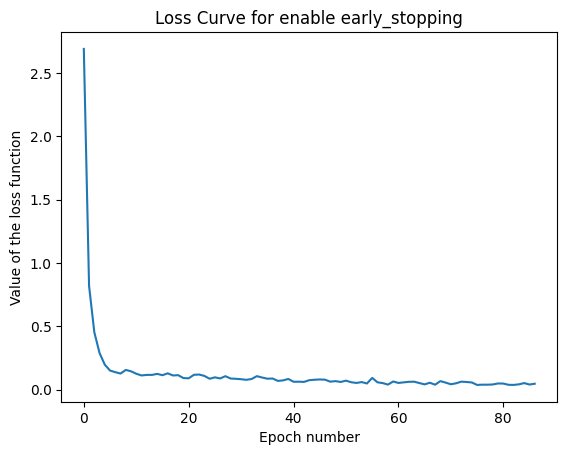

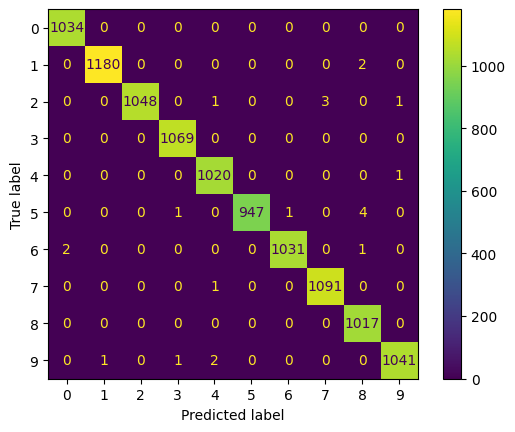

In [18]:
# Train final model with the best params
final_clf = MLPClassifier(**best_params)
final_clf.fit(np.concatenate((train_img, val_img)),
              np.concatenate((train_lbl, val_lbl)))
final_prediction = final_clf.predict(val_img)
final_score = accuracy_score(final_prediction, val_lbl)
print('Final score: ', final_score)
plt.plot(final_clf.loss_curve_)
plt.title('Loss Curve for enable early_stopping')
plt.xlabel('Epoch number')
plt.ylabel('Value of the loss function')
ConfusionMatrixDisplay.from_predictions(final_prediction, val_lbl)
plt.show()